In [ ]:
비지도 학습: 머신러닝의 미래
    입력데이터(X)만 존재, 출력(Y) 없음

In [ ]:
#P221 10개의 숫자이미지 OCR(Optical광학 Character 글자 Recognization 인식)
#비지도학습으로 숫자 인식을 할 수 있음

In [1]:
#221
from sklearn.datasets import load_digits #digits 숫자

In [2]:
digits = load_digits()

In [3]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
digits.target.shape #Y예측목표(타겟)

(1797,)

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:

import matplotlib.pyplot as plt

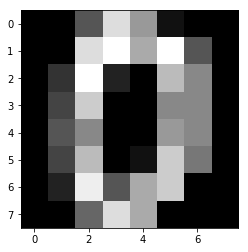

In [12]:
plt.imshow(digits.images[0], cmap='gray')

In [ ]:
#221 64개의 명암값을 2개로 차원축소를해서 2차원그래프에 산점도로 그려봅니다.`

In [20]:
from sklearn.decomposition import PCA
import mglearn

In [17]:
pca = PCA(n_components=2).fit(digits.data) #64차원을 2차원으로 축소

In [19]:
pca_x = pca.transform(digits.data)
digits.data.shape, pca_x.shape

((1797, 64), (1797, 2))

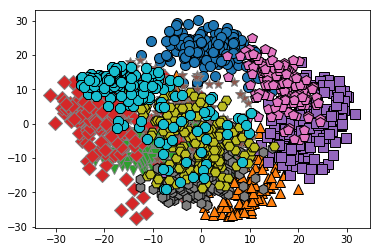

In [22]:
mglearn.discrete_scatter(pca_x[:,0], pca_x[:,1], digits.target)

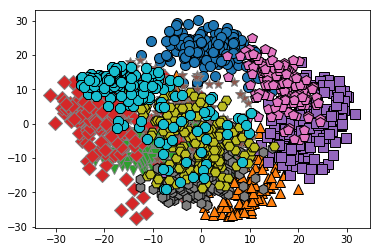

In [23]:
mglearn.discrete_scatter(pca_x[:,0], pca_x[:,1], digits.target)

In [ ]:
#223 (t-SNE)

In [24]:
from sklearn.manifold import TSNE

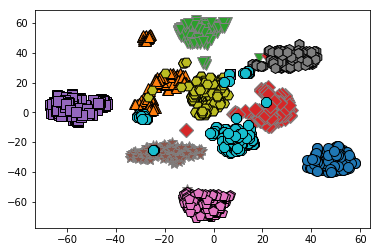

In [26]:
digits_tsne = TSNE().fit_transform(digits.data)
i = mglearn.discrete_scatter(digits_tsne[:,0], digits_tsne[:,1], digits.target)

# 225 군집(Clustering) - 분류, 이상치 검출(Abnormal Detection)
k평균 군집
병합군집
DBSCAN(Density based spatial clustering Application Noise) 밀도가 높은 공간 

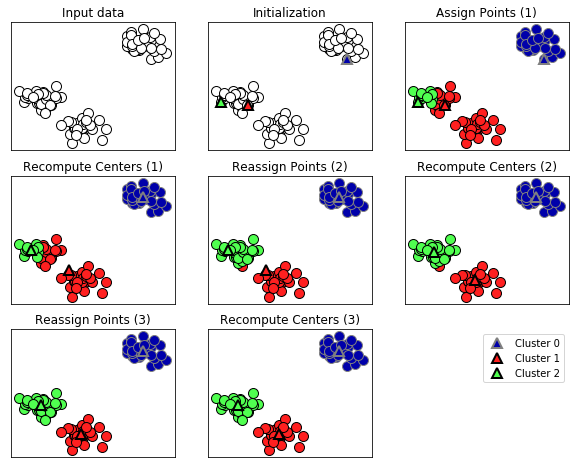

In [27]:
mglearn.plots.plot_kmeans_algorithm()

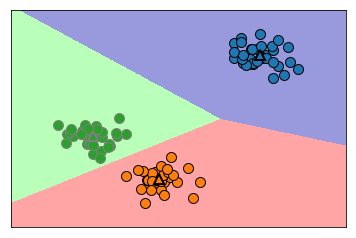

In [33]:
mglearn.plots.plot_kmeans_boundaries()

In [30]:
from sklearn.datasets import make_blobs
x,y = make_blobs() #연습용 데이터셋
x.shape, y.shape

((100, 2), (100,))

In [32]:
y

array([2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0,
       0, 2, 1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1,
       2, 2, 0, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0,
       1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 0, 1,
       1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1])

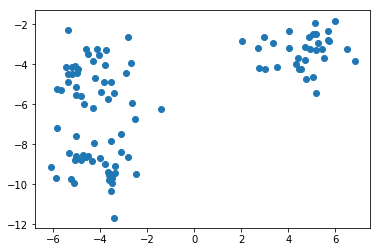

In [35]:
plt.scatter(x[:,0], x[:,1])

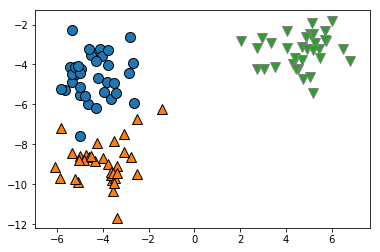

In [36]:
i = mglearn.discrete_scatter(x[:,0], x[:,1],y)

In [40]:
from sklearn.cluster import KMeans

In [49]:
km=KMeans(n_clusters=3).fit(x) #x를 34ㅐ로 그룹화(cluster)

In [50]:
km.predict(x) #x가 몇번째 그룹?

array([1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2,
       2, 1, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0,
       1, 1, 2, 0, 2, 1, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2,
       2, 0, 0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 0,
       0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0])

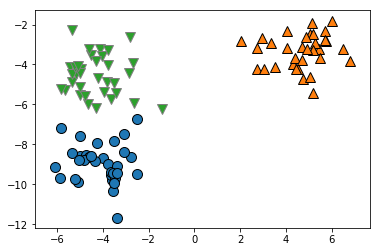

In [51]:
i = mglearn.discrete_scatter(x[:,0], x[:,1],km.predict(x))

In [ ]:
#digits에 적용
-T-SNE로 2개의 차원으로 축소
-그 데이터로 K-means를 fit, k=10
-K-means의 예측을 산점도에 표시

In [52]:
from sklearn.manifold import TSNE
digits_tsne = TSNE().fit_transform(digits.data)

In [53]:
km =KMeans(n_clusters=10).fit(digits_tsne)

In [54]:
predict_group = km.predict(digits_tsne)

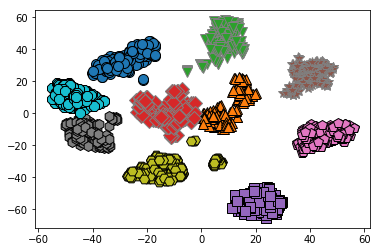

In [55]:
i = mglearn.discrete_scatter(digits_tsne[:,0], digits_tsne[:,1], predict_group)

# 실전 적용

In [ ]:
한국프로야구 군집화하기


In [65]:
import pandas as pd
url = 'http://www.kbreport.com' #다른이름으로 저장
url = 'KBReport _ 한국 프로야구 통계 사이트.html'
tables = pd.read_html(url)
len(tables)

7

In [66]:
baseball = tables[0]
base = baseball.set_index('팀명') #return 없이 inplace 사용시, 2번 실행하면 에러

In [67]:
base.head()

,순위,승,무,패,승률,게임차,득점,실점,연속
팀명,,,,,,,,,
SK,1,59,1,29,0.670,0.0,441,342,2패
두산,2,54,0,36,0.600,6.0,440,346,2승
Hero,3,54,0,37,0.593,6.5,500,387,4승
LG,4,49,1,38,0.563,9.5,377,377,1패
NC,5,42,1,44,0.488,16.0,409,415,2패


In [68]:
data = base.drop(columns = '연속')
data.head()

,순위,승,무,패,승률,게임차,득점,실점
팀명,,,,,,,,
SK,1,59,1,29,0.670,0.0,441,342
두산,2,54,0,36,0.600,6.0,440,346
Hero,3,54,0,37,0.593,6.5,500,387
LG,4,49,1,38,0.563,9.5,377,377
NC,5,42,1,44,0.488,16.0,409,415


In [69]:
data.shape

(10, 8)

In [83]:
#PCA이용하여 2차원으로 변환한 후 k개로 클러스터링
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import mglearn
pca = PCA(n_components=2).fit(data)
data_pca = pca.transform(data)
data_pca.shape

(10, 2)

In [84]:
#kmeans로 클러스터링
km = KMeans(n_clusters = 3).fit(data_pca)
group = km.predict(data_pca)

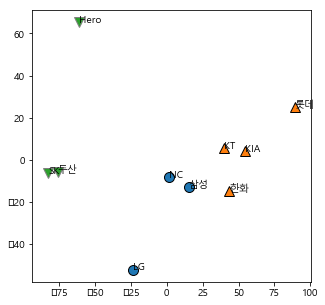

In [86]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(5,5))
plt.xlim(data_pca[:,0].min(),data_pca[:,0].max()+1)
plt.ylim(data_pca[:,1].min(),data_pca[:,1].max()+1)
for i in range(len(data_pca)):
    plt.text(data_pca[i,0], data_pca[i,1], data.index[i])
i = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], group)

In [ ]:
머신러닝 저장소 - 3위 와인데이터 (와인의 질, 컬러, 알콜 도수 등을 측정 - 원산지를 추정하는 문제)

In [89]:
wine = pd.read_csv('wine.data', header = None)

In [90]:
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [111]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
0     178 non-null int64
1     178 non-null float64
2     178 non-null float64
3     178 non-null float64
4     178 non-null float64
5     178 non-null int64
6     178 non-null float64
7     178 non-null float64
8     178 non-null float64
9     178 non-null float64
10    178 non-null float64
11    178 non-null float64
12    178 non-null float64
13    178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [115]:
#PCA이용하여 2차원으로 변환한 후 k개로 클러스터링
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import mglearn
x = wine.iloc[:, 1:] #1번째 컬럼의 원산지 빼고 나머지 컬럼을 대상으로..
pca = PCA(n_components=2).fit(x)
data_pca = pca.transform(x)
data_pca.shape

(178, 2)

In [116]:
#kmeans로 k개로 클러스터링
km = KMeans(n_clusters = 3).fit(data_pca)
group = km.predict(data_pca)

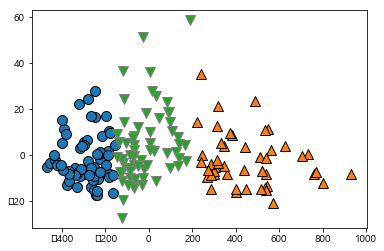

In [117]:
i = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], group)

In [139]:
loans = pd.read_csv('loans.csv', skiprows=1, header = None)
loans.shape

(9578, 14)

In [140]:
1) get_dummy()로 purpose 원핫 인코딩
2) PCA로 2차원 축소
3) k-means(2)개로 그룹화
4) 산점도 출력

SyntaxError: invalid syntax (<ipython-input-140-1e53f10b9fc2>, line 1)

In [141]:
loans.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [142]:
loans = loans.dropna()
df = pd.get_dummies(loans)

In [143]:
df.head()

,0,2,3,4,5,6,7,8,9,10,11,12,13,1_all_other,1_credit_card,1_debt_consolidation,1_educational,1_home_improvement,1_major_purchase,1_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0,0,1,0,0,0,0,0


In [144]:
pca = PCA(n_components=2).fit(df)
data_pca = pca.transform(df) #주성분 2개 추출, 2차원으로 축소

km = KMeans(n_clusters=2).fit(data_pca) #2개로 그룹화
group = km.predict(data_pca)

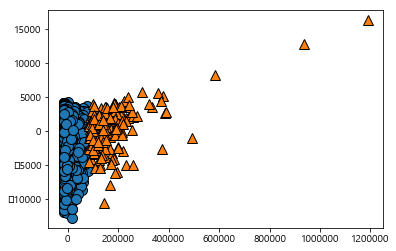

In [145]:
i = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], group) #예측

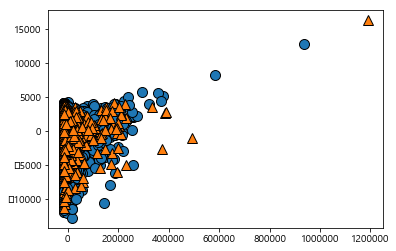

In [146]:
i = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], loans.iloc[:,-1]) #돈안갚는 사람